# Laboratorio 01

Universidad del Valle de Guatemala, Visión por Computadora, 2025
Realizado por Diego Morales, Angel Castellanos, Alejandro Azurdia


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, exposure

## 1. Implementar en Python una función que haga la ecualización de histograma para una imagen en escala de grises (8 bits).

Mostrar a través de ejemplos la imagen original y la imagen ecualizada. Mostrar también los histogramas normalizados y su distribución acumulada de ambas imágenes. Comparar los resultados de su función contra alguna función ya predefinida en Python para calcular ecualizaciones. Por ejemplo, en scikit-image, tenemos la función skimage.exposure.equalize hist; o en OpenCV, tenemos la función cv2.equalizeHist. ¿Son iguales sus resultados con los de la función de Python? Explique por qué son iguales o explique por qué hay diferencias.

In [9]:
def equalize_histogram_manual(image):
    """
    Ecualiza el histograma de una imagen en escala de grises (8 bits).
    """
    # 1. Calcular el histograma (256 bins, para intensidades 0 a 255)
    hist, _ = np.histogram(image.flatten(), bins=256, range=[0, 256])
    
    # 2. Calcular la CDF (suma acumulada del histograma)
    cdf = hist.cumsum()
    
    # 3. Enmascarar los ceros en la CDF para evitar divisiones por cero
    cdf_masked = np.ma.masked_equal(cdf, 0)
    
    # 4. Normalizar la CDF:
    #    - Restar el valor mínimo no nulo
    #    - Dividir entre (total de píxeles - valor mínimo)
    #    - Multiplicar por 255 para escalar a [0,255]
    cdf_min = cdf_masked.min()
    total_pixels = image.size
    cdf_normalized = (cdf_masked - cdf_min) * 255 / (total_pixels - cdf_min)
    
    # 5. Rellenar los valores enmascarados y convertir a uint8
    cdf_final = np.ma.filled(cdf_normalized, 0).astype('uint8')
    
    # 6. Mapear cada píxel de la imagen original a su nuevo valor
    image_eq = cdf_final[image]
    
    return image_eq, hist, cdf

In [10]:
# %%
# Cargar la imagen (asegúrate de que "img/rice.jpg" exista en la ruta indicada)
image_float = io.imread("img/rice.jpg", as_gray=True)

# Convertir la imagen float ([0,1]) a uint8 ([0,255]) para la versión manual
image_uint8 = (image_float * 255).astype(np.uint8)

In [11]:
# Ecualización manual
image_eq_manual, hist_manual_orig, cdf_manual_orig = equalize_histogram_manual(image_uint8)
hist_eq_manual, _ = np.histogram(image_eq_manual.flatten(), bins=256, range=[0,256])
cdf_eq_manual = hist_eq_manual.cumsum()


In [12]:
# Ecualización con skimage
# La función equalize_hist retorna una imagen float en el rango [0,1]
image_eq_skimage_float = exposure.equalize_hist(image_float)
# Convertir a uint8 para comparar
image_eq_skimage = (image_eq_skimage_float * 255).astype(np.uint8)
hist_eq_skimage, _ = np.histogram(image_eq_skimage.flatten(), bins=256, range=[0,256])
cdf_eq_skimage = hist_eq_skimage.cumsum()

In [13]:
# Histograma y CDF de la imagen original
hist_orig, _ = np.histogram(image_uint8.flatten(), bins=256, range=[0,256])
cdf_orig = hist_orig.cumsum()

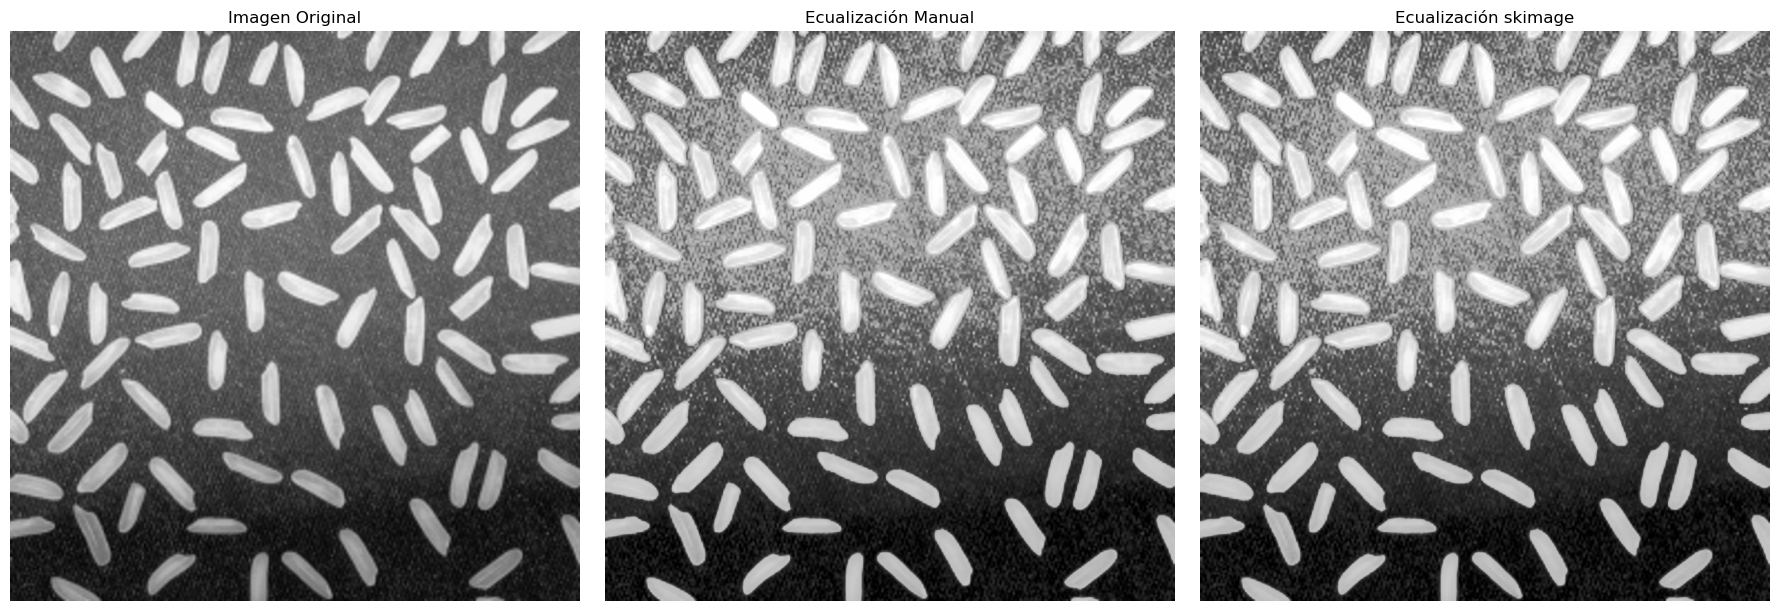

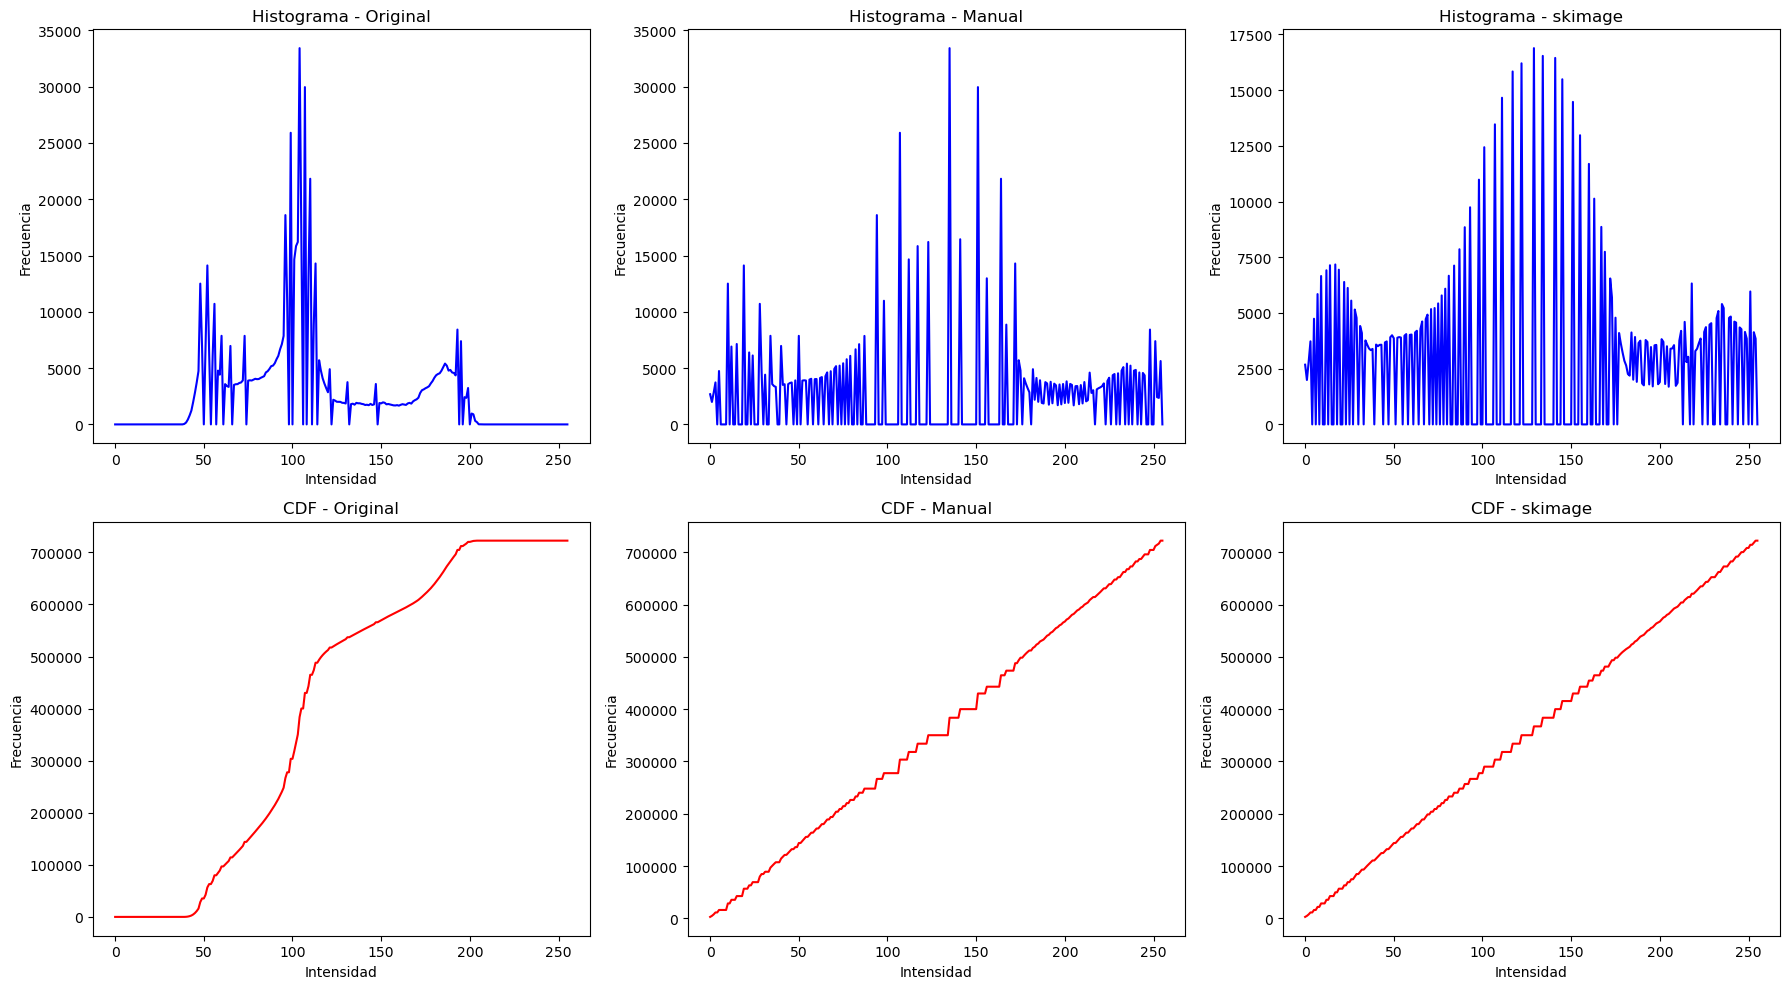

In [14]:
# %%
# Figura 1: Imágenes lado a lado
fig1, axes = plt.subplots(1, 3, figsize=(18,6))
axes[0].imshow(image_uint8, cmap='gray')
axes[0].set_title("Imagen Original")
axes[0].axis("off")

axes[1].imshow(image_eq_manual, cmap='gray')
axes[1].set_title("Ecualización Manual")
axes[1].axis("off")

axes[2].imshow(image_eq_skimage, cmap='gray')
axes[2].set_title("Ecualización skimage")
axes[2].axis("off")

plt.tight_layout()
plt.show()

# %%
# Figura 2: Histogramas y CDFs
bins = np.arange(256)
fig2, axs = plt.subplots(2, 3, figsize=(18,10))

# Primer fila: Histogramas
axs[0, 0].plot(bins, hist_orig, color='blue')
axs[0, 0].set_title("Histograma - Original")
axs[0, 1].plot(bins, hist_eq_manual, color='blue')
axs[0, 1].set_title("Histograma - Manual")
axs[0, 2].plot(bins, hist_eq_skimage, color='blue')
axs[0, 2].set_title("Histograma - skimage")

# Segunda fila: CDFs
axs[1, 0].plot(bins, cdf_orig, color='red')
axs[1, 0].set_title("CDF - Original")
axs[1, 1].plot(bins, cdf_eq_manual, color='red')
axs[1, 1].set_title("CDF - Manual")
axs[1, 2].plot(bins, cdf_eq_skimage, color='red')
axs[1, 2].set_title("CDF - skimage")

# Etiquetas para todos los ejes
for ax in axs.flat:
    ax.set_xlabel("Intensidad")
    ax.set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()

## Comparacion de Resultados entre ecualizacion manual y ecualizacion con librerias. 

Al observar las imágenes ecualizadas tanto con el algoritmo manual como con la función de OpenCV, podemos notar que ambas presentan un notable aumento en el contraste en comparación con la imagen original. Esto se debe a que, en esencia, ambos métodos aplican el mismo principio: utilizan la función de distribución acumulada (CDF) para redistribuir los niveles de intensidad de forma que se aproveche mejor el rango dinámico disponible.

Sin embargo, al analizar los histogramas resultantes, se aprecian pequeñas diferencias en la distribución de frecuencias. Estas discrepancias se deben a que, aunque el fundamento teórico es idéntico, la implementación de la función de OpenCV está altamente optimizada y puede incorporar ajustes adicionales—como estrategias de interpolación o manejo refinado de los extremos—que permiten una mayor precisión o eficiencia en el cálculo. Por el contrario, la implementación manual sigue el algoritmo clásico sin tales optimizaciones, lo que puede derivar en ligeras variaciones en el mapeo final de intensidades.

En resumen, ambos métodos generan resultados visualmente similares y logran mejorar el contraste de la imagen original, pero las pequeñas diferencias en los histogramas reflejan las particularidades y mejoras implementadas en la versión de OpenCV.

# 2. Implementar tres algoritmos para segmentación binaria de imágenes. De estos, uno debe ser un algoritmo local.  
Aplicar cada uno de estos algoritmos a, al menos, tres imágenes en escala de grises diferentes y comparar los resultados obtenidos de cada segmentador (mostrar visualmente la imagen original y las binarizaciones). Concluya cuál de sus algoritmos obtiene mejores resultados.

In [15]:
from skimage import data, filters, img_as_float
from skimage.filters import threshold_otsu, threshold_local

1. Segmentación Global – Otsu: Se calcula el umbral óptimo usando el método de Otsu.
2. Segmentación Global – Umbral Fijo: Se utiliza el valor medio de la imagen como umbral fijo.
3. Segmentación Local – Umbral Adaptativo: Se aplica una umbralización local (adaptativa) usando un bloque de vecindad para calcular el umbral de cada píxel

In [24]:
def segmentacion_otsu(image):
    """Segmentación binaria usando el método de Otsu."""
    thresh = threshold_otsu(image)
    binary = image > thresh
    return binary

In [25]:
def segmentacion_umbral_fijo(image):
    """Segmentación binaria usando un umbral fijo (valor medio de la imagen)."""
    thresh = image.mean()
    binary = image > thresh
    return binary

In [30]:
def segmentacion_local(image, block_size=35, offset=0.04, method='mean'):
    """
    Segmentación binaria local usando umbralización adaptativa.
    
    Parámetros:
      image: Imagen en escala de grises (float o uint8).
      block_size: Tamaño del vecindario (debe ser impar).
      offset: Valor a restar al umbral calculado localmente. Para imágenes en [0,1],
              se recomienda un valor pequeño (por ejemplo, 0.04).
      method: Método para calcular el umbral local. Ejemplo: 'mean', 'median', 'gaussian'.
    Retorna:
      binary: Imagen binarizada (array booleano).
    """
    image_float = img_as_float(image)
    local_thresh = threshold_local(image_float, block_size, offset=offset, method=method)
    # Depuración: ver valores de umbral
    print(f"DEBUG: Umbral local ({method}) para bloque de {block_size} y offset {offset}: min = {local_thresh.min():.3f}, max = {local_thresh.max():.3f}")
    binary = image_float > local_thresh
    return binary


In [27]:
# Cargar imágenes de ejemplo
rutas_imagenes = [
    "img/21.jpg",
    "img/22.jpg",
    "img/23.jpg",
]

In [28]:
# Cargar cada imagen y almacenarlas en una lista junto con un identificador (en este caso, la ruta)
imagenes = []
for ruta in rutas_imagenes:
    # Leer la imagen en escala de grises
    img = io.imread(ruta, as_gray=True)
    imagenes.append((ruta, img))

DEBUG: Umbral local (mean) para bloque de 35 y offset 0.04: min = -0.040, max = 0.872
DEBUG: Umbral local (mean) para bloque de 35 y offset 0.04: min = 0.087, max = 0.847
DEBUG: Umbral local (mean) para bloque de 35 y offset 0.04: min = -0.025, max = 0.884


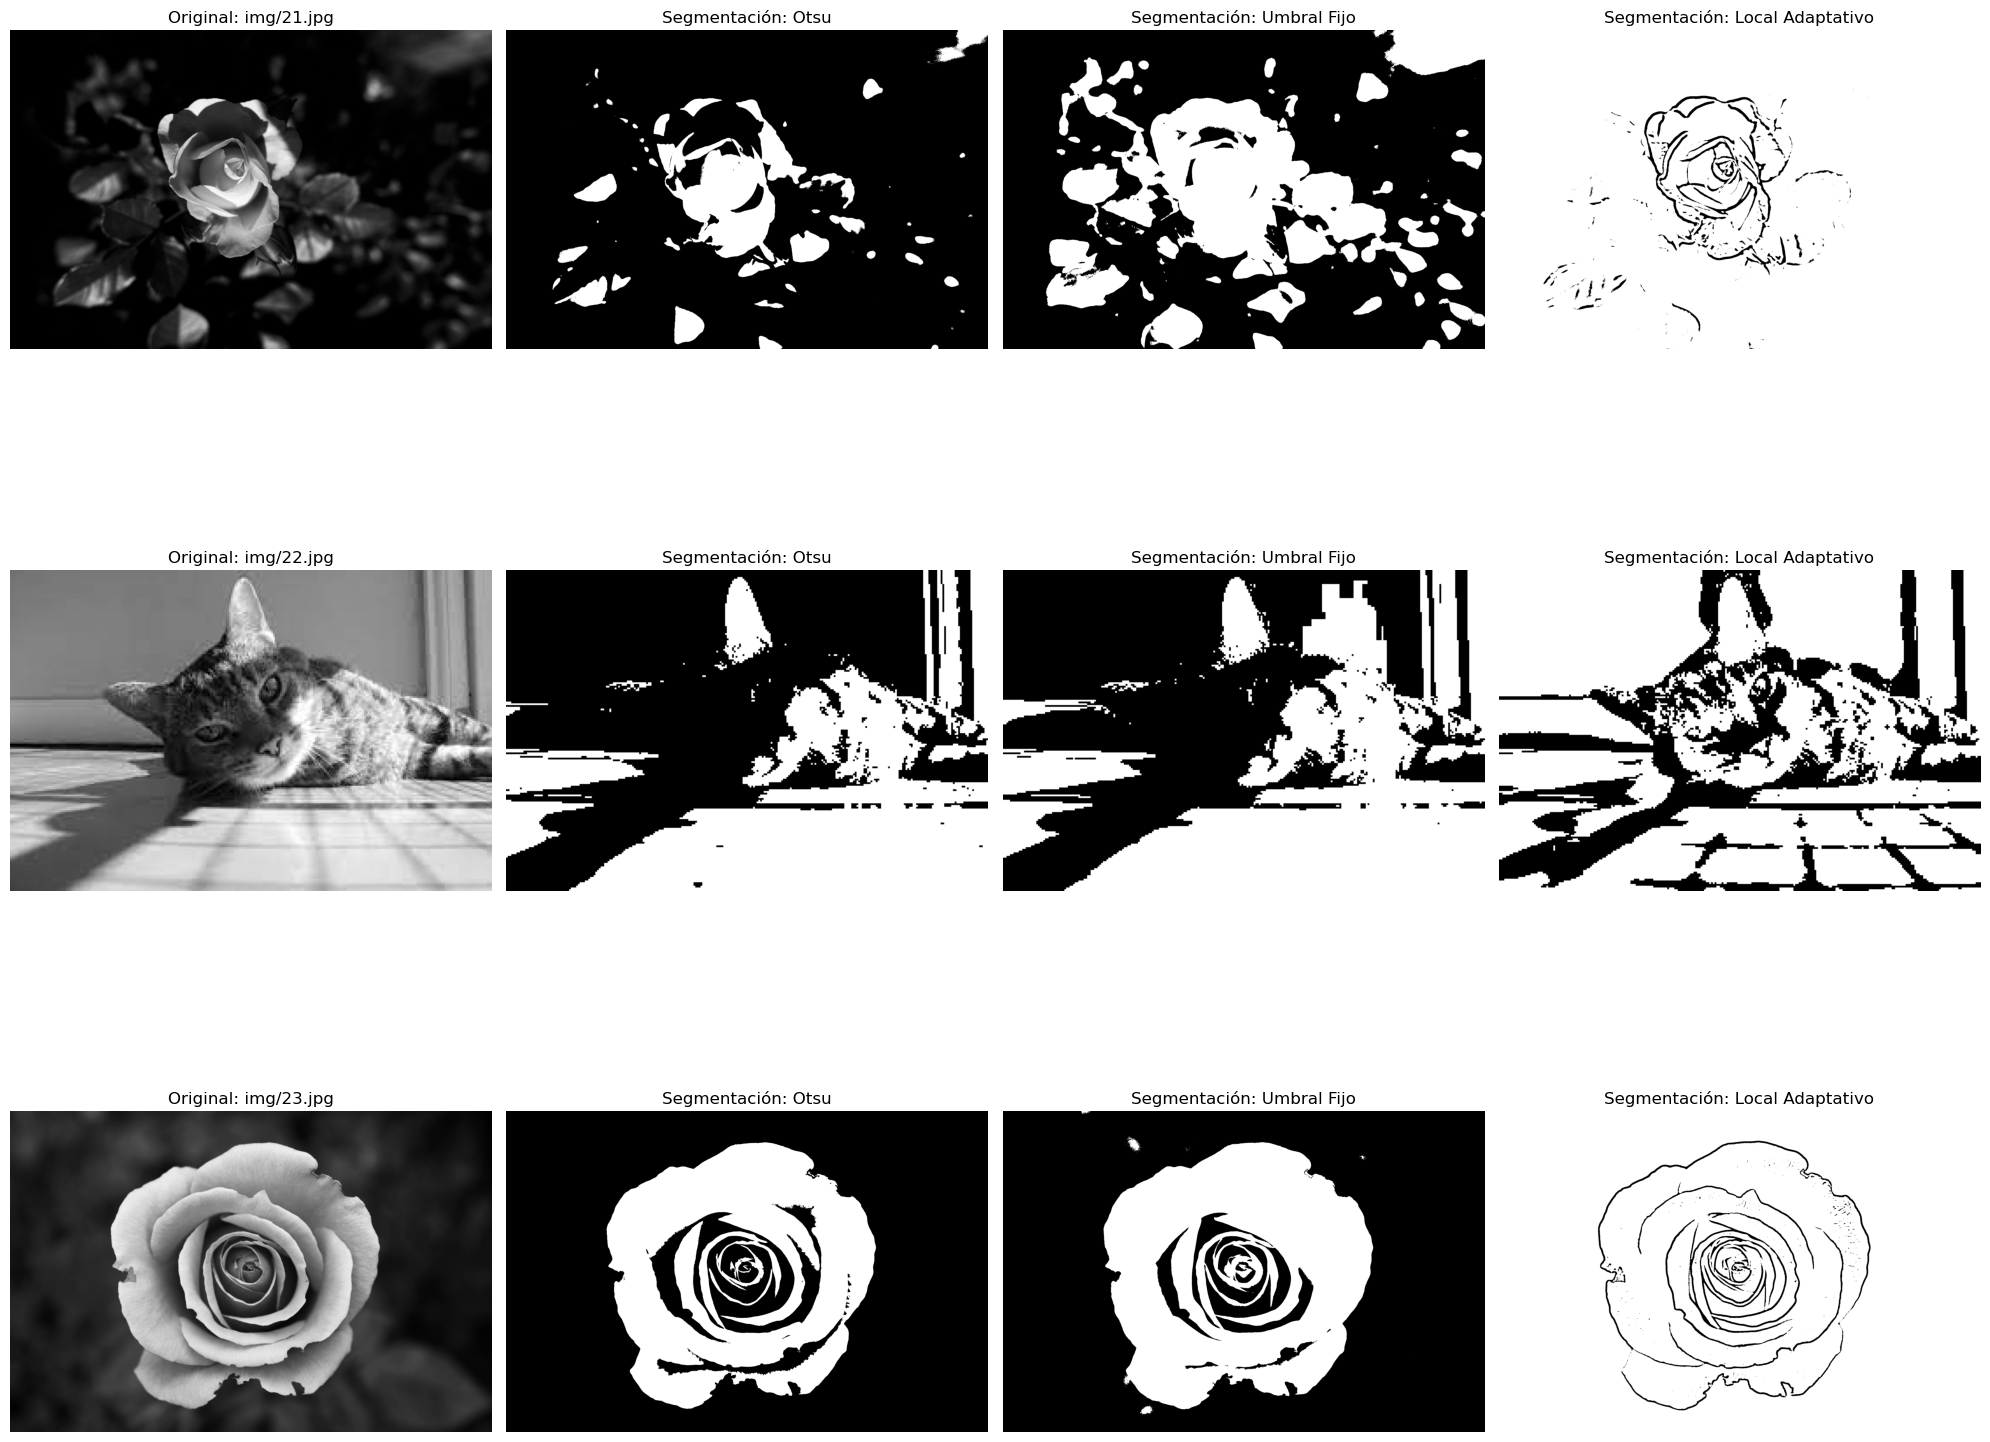

In [31]:
num_imagenes = len(imagenes)
fig, axes = plt.subplots(nrows=num_imagenes, ncols=4, figsize=(20, 6 * num_imagenes))

for idx, (nombre, img) in enumerate(imagenes):
    # Convertir la imagen a float (útil para los cálculos)
    img_float = img_as_float(img)
    
    # Aplicar los algoritmos de segmentación
    binary_otsu  = segmentacion_otsu(img_float)
    binary_fixed = segmentacion_umbral_fijo(img_float)
    # Puedes experimentar con diferentes métodos y offsets:
    binary_local = segmentacion_local(img_float, block_size=35, offset=0.04, method='mean')
    
    # Mostrar la imagen original y las segmentaciones en la misma fila
    ax = axes[idx]
    
    ax[0].imshow(img, cmap='gray')
    ax[0].set_title(f"Original: {nombre}")
    ax[0].axis("off")
    
    ax[1].imshow(binary_otsu, cmap='gray')
    ax[1].set_title("Segmentación: Otsu")
    ax[1].axis("off")
    
    ax[2].imshow(binary_fixed, cmap='gray')
    ax[2].set_title("Segmentación: Umbral Fijo")
    ax[2].axis("off")
    
    ax[3].imshow(binary_local, cmap='gray')
    ax[3].set_title("Segmentación: Local Adaptativo")
    ax[3].axis("off")

plt.tight_layout()
plt.show()

En teoría, el método de segmentación Otsu ofrece resultados sólidos al separar los píxeles en dos clases (por debajo y por encima del umbral) basándose en la distribución global de intensidades, lo que resulta especialmente efectivo en imágenes con un histograma bimodal. Sin embargo, desde un punto de vista visual, el segmentador local resultó más útil, ya que al ajustar el umbral de forma adaptativa en función de la vecindad, logra resaltar de manera más precisa los contornos y detalles finos de la imagen.

Aunque Otsu garantiza una segmentación equilibrada en términos estadísticos, la segmentación local facilita la detección de bordes relevantes, lo que puede ser crucial en aplicaciones donde la definición precisa de los contornos es importante. En resumen, mientras que Otsu se fundamenta en criterios globales robustos, la segmentación local aporta ventajas en la precisión visual, evidenciando que la elección del método dependerá de las necesidades específicas del análisis.

# 3 Implementar un algoritmo de segmentación para imágenes RGB
Para poder ejecutar el siguiente código es necesario tener instalado:
- OpenCV (cv2)
- NumPy
- Matplotlib
- scikit-learn (KMeans)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
def segmentar_imagen(imagen, k):
    alto, ancho, canales = imagen.shape
    pixels = imagen.reshape((-1, 3))
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pixels)
    labels = kmeans.labels_
    centros = kmeans.cluster_centers_
    
    labels_img = labels.reshape(alto, ancho)
    
    imagen_cuantizada = centros[labels].reshape(alto, ancho, 3).astype(np.uint8)
    
    return labels_img, imagen_cuantizada

In [3]:
def mostrar_resultados(imagen_original, mapa_segmentos, imagen_cuantizada, titulo_extra=""):
    plt.figure(figsize=(15,5))
    
    plt.subplot(1, 3, 1)
    plt.imshow(imagen_original)
    plt.title("Imagen Original" + titulo_extra)
    plt.axis("off")
    
    plt.subplot(1, 3, 2)
    plt.imshow(mapa_segmentos, cmap="viridis")
    plt.title("Mapa de Segmentos")
    plt.axis("off")
    
    plt.subplot(1, 3, 3)
    plt.imshow(imagen_cuantizada)
    plt.title("Imagen Cuantizada")
    plt.axis("off")
    
    plt.tight_layout()
    plt.show()

In [15]:
def RGBKmeans(imagen, k):
    imagenes = {
        '1': './imagenes/fachada.jpg',
        '2': './imagenes/gradiente.jpg',
        '3': './imagenes/pixelart.jpg',
        '4': './imagenes/solidos.jpg',
    }
    imagen = str(imagen)
    ruta_imagen = imagenes.get(imagen)
    
    if k < 2:
        print("El valor de k debe ser mayor o igual a 2.")
        return
    
    imagen_bgr = cv2.imread(ruta_imagen)
    if imagen_bgr is None:
        print("No se pudo cargar la imagen. Verifica la ruta.")
        return
    imagen_rgb = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2RGB)
    
    mapa_segmentos, imagen_cuantizada = segmentar_imagen(imagen_rgb, k)
    
    mostrar_resultados(imagen_rgb, mapa_segmentos, imagen_cuantizada)

## Ejemplos Buenos

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


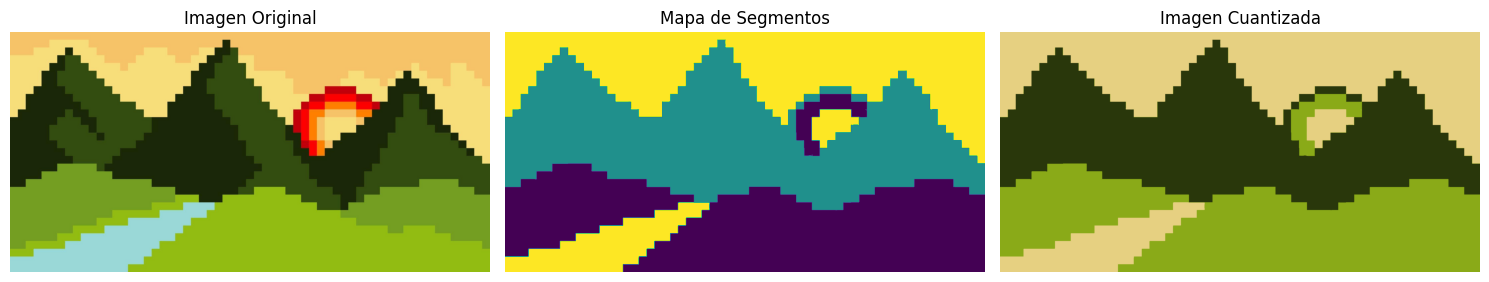

In [25]:
RGBKmeans(3, 3)

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


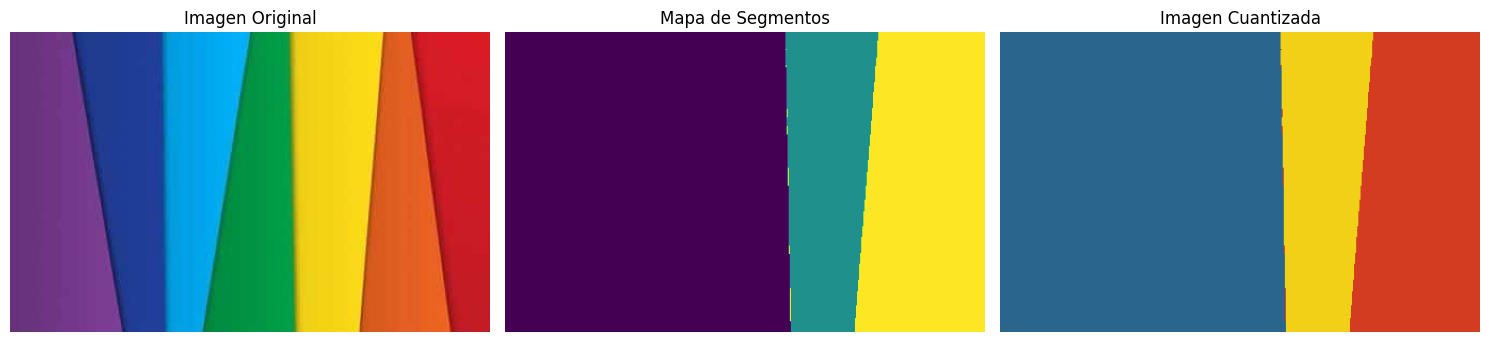

In [26]:
RGBKmeans(4, 3)

## Ejemplos Malos

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


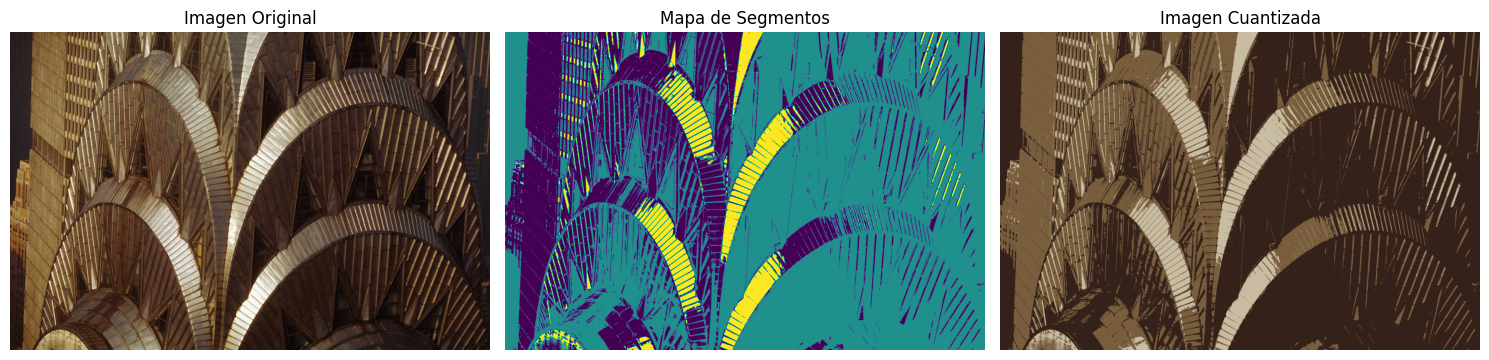

In [27]:
RGBKmeans(1, 3)

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


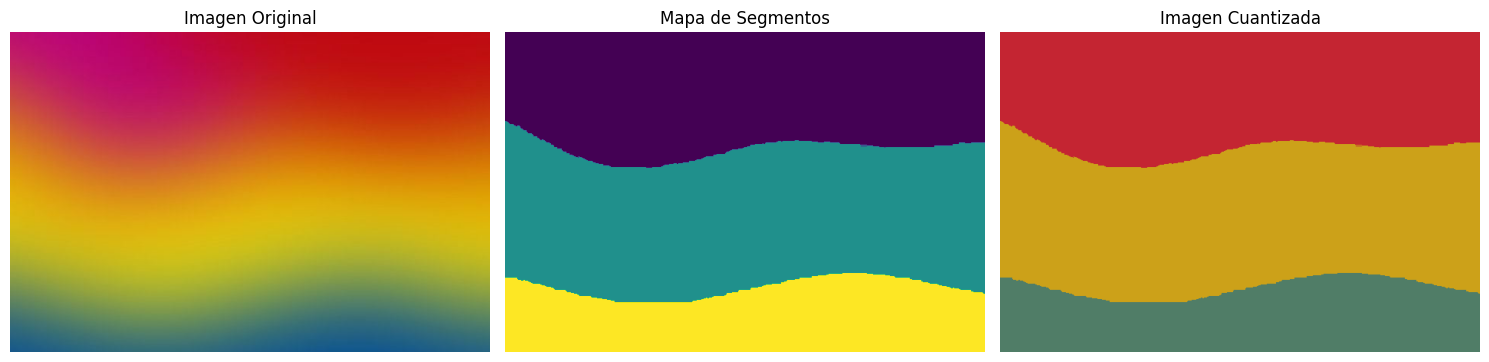

In [28]:
RGBKmeans(2, 3)

En los primeros dos ejemplos (“buenos”) se aprecia que el algoritmo funciona adecuadamente cuando la imagen presenta regiones de color bien definidas y límites claros entre ellas. El mapa de segmentos muestra separaciones consistentes y la imagen cuantizada reproduce fielmente los colores predominantes en cada zona, reflejando la capacidad de k-means para agrupar con éxito los píxeles que tienen tonalidades similares. No obstante, el hecho de haber elegido k = 3 implica que la imagen se divida únicamente en tres zonas, lo que puede agrupar en un mismo segmento matices que tal vez, con un valor de k mayor, habrían quedado separados.

En contraste, en las dos últimas imágenes (“malas”) se notan las limitaciones de k-means ante gradientes suaves o texturas muy complejas. El algoritmo tiende a forzar fronteras donde no existen transiciones abruptas de color, generando divisiones que no siempre coinciden con la percepción humana. Además, al usar un número fijo de tres segmentos, se restringe la capacidad de representar variaciones más sutiles, obligando a que toda la imagen quede encuadrada dentro de esas tres categorías cromáticas.

# 4  Pepsi y Cocacola

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [38]:
def show_hue_histogram(image_path, title):
    img_bgr = cv2.imread(image_path)
    
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    
    img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
    
    H = img_hsv[:, :, 0]
    
    hist_H = cv2.calcHist([H], [0], None, [180], [0, 180])
    
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Imagen original (RGB)")
    plt.axis("off")
    
    plt.subplot(1, 2, 2)
    plt.plot(hist_H, color='blue')
    plt.title(f"Histograma de Matiz - {title}")
    plt.xlabel("Valores de H (Hue)")
    plt.ylabel("Frecuencia")
    plt.xlim([0, 180])
    
    plt.tight_layout()
    plt.show()


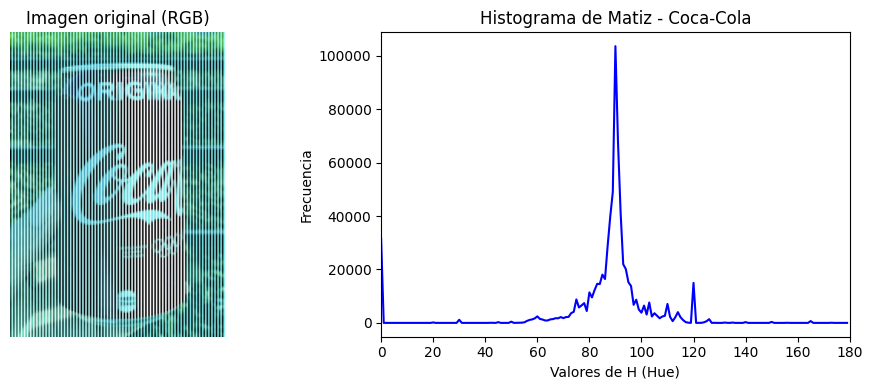

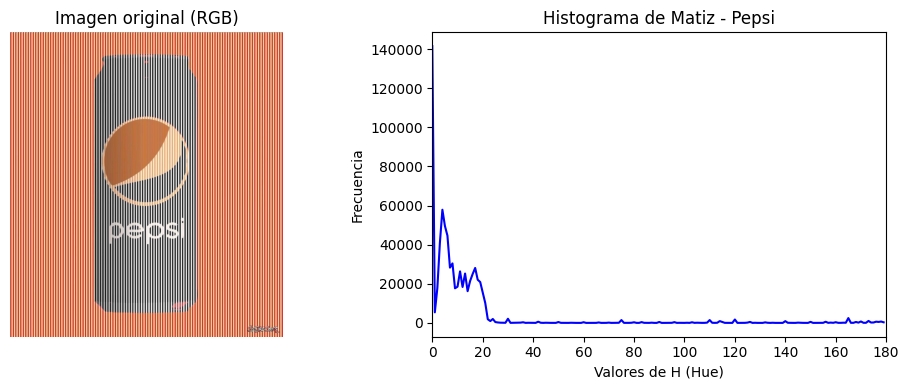

: 

In [39]:
ruta_coca = "./imagenes/coca-cola.jpeg"
ruta_pepsi = "./imagenes/pepsi.png"

show_hue_histogram(ruta_coca, "Coca-Cola")
show_hue_histogram(ruta_pepsi, "Pepsi")

La primera imagen, asociada con Coca-Cola, exhibe en su histograma una clara concentración de matices en la región del cian, lo que sugiere que la lata se desplaza hacia tonalidades verde-azuladas. Sin embargo, al contemplarla, tiende a interpretarse como roja gracias a la presencia del logotipo y la forma distintiva que la caracterizan. Esta disonancia entre lo que reflejan los datos objetivos y la percepción surge porque la experiencia previa y la asociación cognitiva llevan a corregir la señal cromática, de modo que se preserve el color tradicional esperado.

La segunda imagen, vinculada a Pepsi, presenta un pico notable en los rangos de naranja, aunque la impresión general apunta a que domina el azul. De nuevo, la referencia cultural y la familiaridad con el producto desempeñan un papel crucial: la forma de la lata y el diseño del emblema generan la expectativa de un tono azul, que termina “enmascarando” los valores reales de matiz. Esta convergencia entre la memoria visual y la interpretación subjetiva de la realidad evidencia cómo la información previa puede sobreponerse a la evidencia cromática que ofrecen los datos.